In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Import Module

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [4]:
os.chdir('/content/gdrive/My Drive/Rakamin_Project_Based_Internship')

# Load Dataset

In [5]:
#load the dataset
loan_data = pd.read_csv('loan_data_2007_2014.csv')
loan_data.head(5)


<ipython-input-5-592a39b821ad>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
loan_data.shape

(466285, 75)

In [7]:
loan_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [8]:
# Cek kolom dengan NaN Value
nan_columns = loan_data.isna().sum()
nan_columns = nan_columns[nan_columns > 0]
print(nan_columns)

emp_title                       27588
emp_length                      21008
annual_inc                          4
desc                           340304
title                              21
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_util                        340
total_acc                          29
last_pymnt_d                      376
next_pymnt_d                   227214
last_credit_pull_d                 42
collections_12_mths_ex_med        145
mths_since_last_major_derog    367311
annual_inc_joint               466285
dti_joint                      466285
verification_status_joint      466285
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
open_acc_6m                    466285
open_il_6m  

In [9]:
columns_to_drop = [
    'Unnamed: 0',
    'id',
    'member_id',
    'url',
    'desc',
    'title',
    'zip_code',
    'policy_code',
    'annual_inc_joint',
    'dti_joint',
    'verification_status_joint',
    'open_acc_6m',
    'open_il_6m',
    'open_il_12m',
    'open_il_24m',
    'mths_since_rcnt_il',
    'total_bal_il',
    'il_util',
    'open_rv_12m',
    'open_rv_24m',
    'max_bal_bc',
    'all_util',
    'inq_fi',
    'total_cu_tl',
    'application_type',
    'inq_last_12m',
    'emp_title',
    'issue_d',
    'pymnt_plan',
    'initial_list_status',
    'mths_since_last_delinq',
    'mths_since_last_record',
    'next_pymnt_d',
    'last_pymnt_d',
    'last_credit_pull_d',
     'mths_since_last_major_derog',
    'tot_coll_amt',
    'tot_cur_bal',
    'total_rev_hi_lim',
    'collections_12_mths_ex_med',
    'acc_now_delinq',
    'recoveries',
    'total_rec_late_fee',
    'collection_recovery_fee',
     'out_prncp_inv',
     'inq_last_6mths',
     'pub_rec',
     'delinq_2yrs',
    'purpose',
    'addr_state',
    'out_prncp'
]

loan_data.drop(columns=columns_to_drop, inplace=True, axis= 1)

In [10]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            466285 non-null  int64  
 1   funded_amnt          466285 non-null  int64  
 2   funded_amnt_inv      466285 non-null  float64
 3   term                 466285 non-null  object 
 4   int_rate             466285 non-null  float64
 5   installment          466285 non-null  float64
 6   grade                466285 non-null  object 
 7   sub_grade            466285 non-null  object 
 8   emp_length           445277 non-null  object 
 9   home_ownership       466285 non-null  object 
 10  annual_inc           466281 non-null  float64
 11  verification_status  466285 non-null  object 
 12  loan_status          466285 non-null  object 
 13  dti                  466285 non-null  float64
 14  earliest_cr_line     466256 non-null  object 
 15  open_acc         

**Distribusi data setelah drop column**

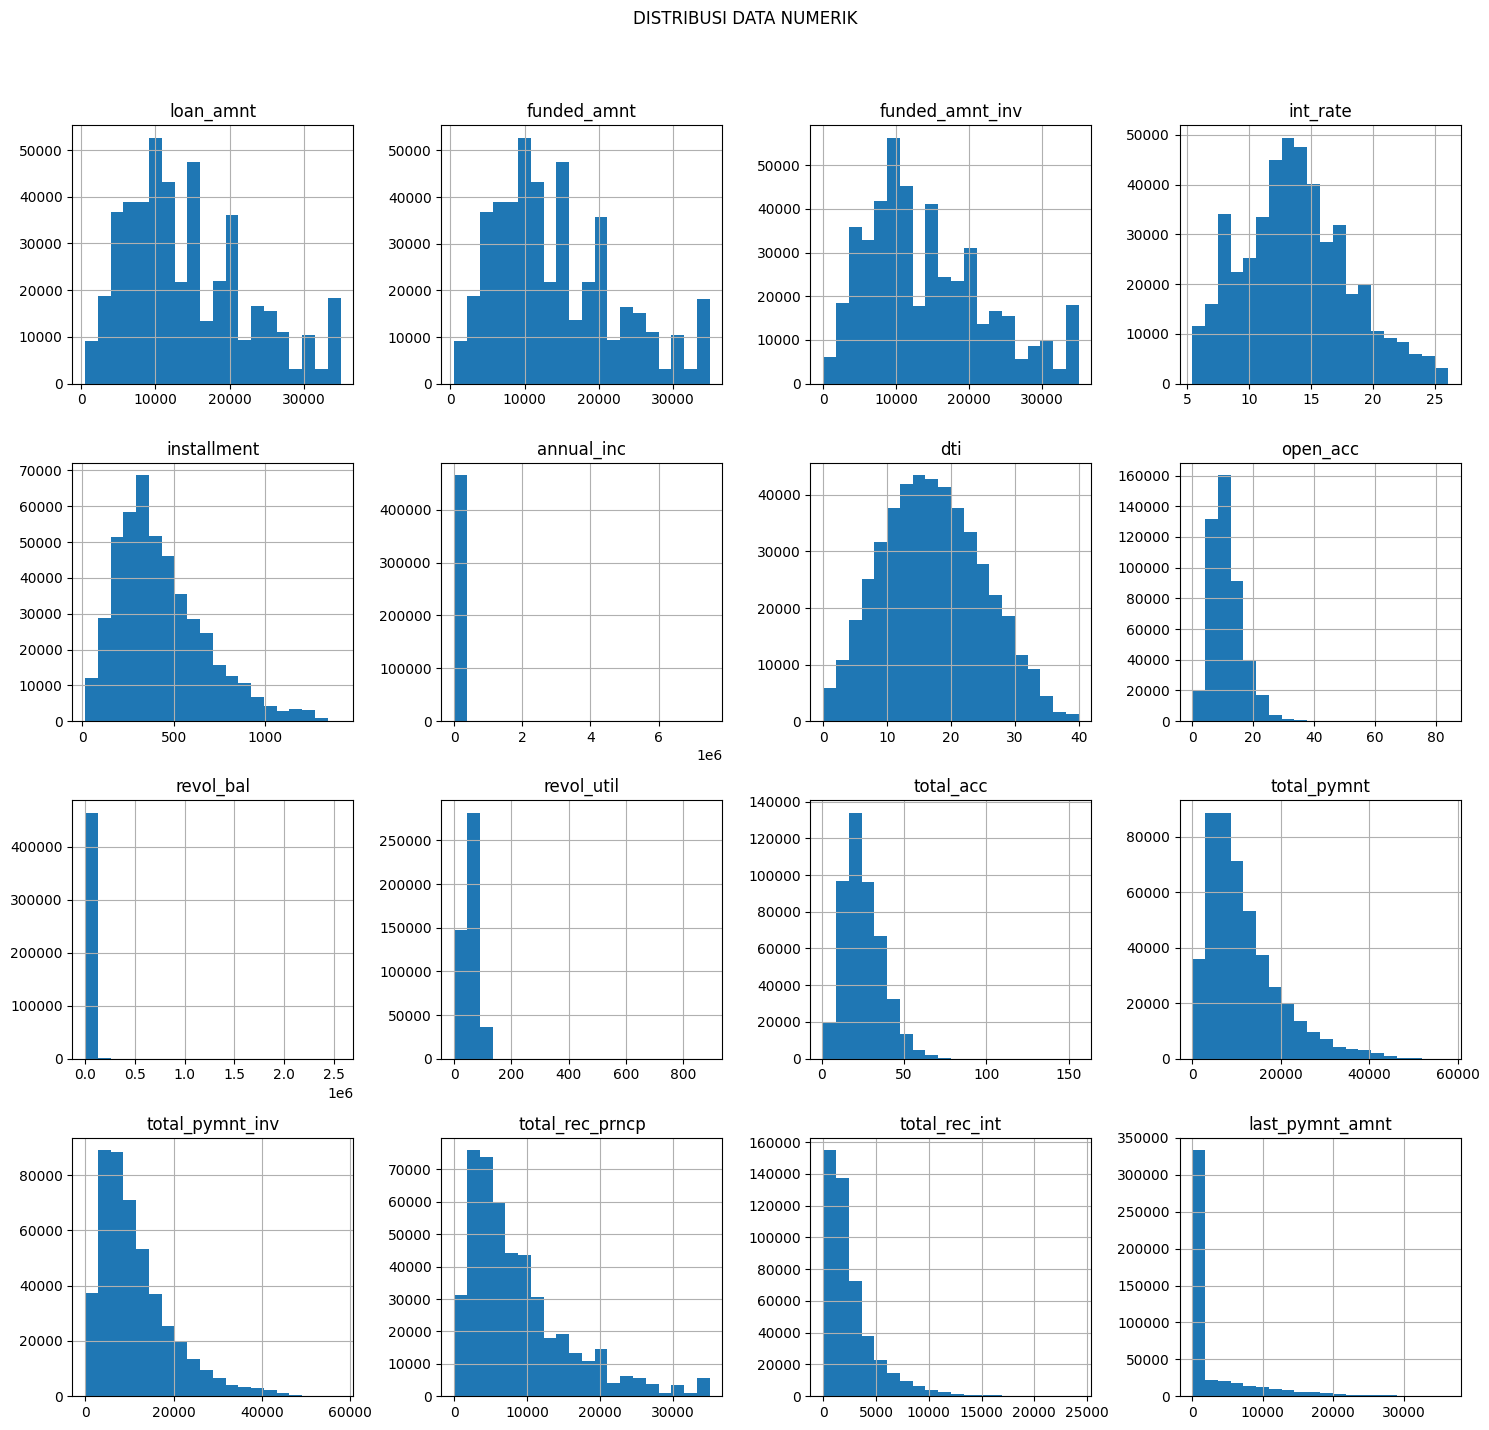

In [11]:
# Memilih kolom-kolom numerik
columns = [
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment',
    'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'emp_length',
    'total_acc', 'total_pymnt', 'total_pymnt_inv',
    'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt'
]

# Menampilkan distribusi dari kolom-kolom numerik
loan_data[columns].hist(bins=20, figsize=(15, 15))
plt.suptitle("DISTRIBUSI DATA NUMERIK")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Clean Data**

In [12]:
loan_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000
mean,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,11.187069,1.623020e+04,56.176947,25.064430,11540.686220,11469.892747,8866.014657,2588.677225,3123.913796
std,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,4.987526,2.067625e+04,23.732628,11.600141,8265.627112,8254.157579,7031.687997,2483.809661,5554.737393
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,8.000000,6.413000e+03,39.200000,17.000000,5552.125349,5499.250000,3708.560000,957.280000,312.620000
50%,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,10.000000,1.176400e+04,57.600000,23.000000,9419.250943,9355.430000,6817.760000,1818.880000,545.960000
75%,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,14.000000,2.033300e+04,74.700000,32.000000,15308.158460,15231.310000,12000.000000,3304.530000,3187.510000
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,84.000000,2.568995e+06,892.300000,156.000000,57777.579870,57777.580000,35000.030000,24205.620000,36234.440000


In [13]:
# Menampilkan baris dengan nilai hilang
print(loan_data.isnull().sum())

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length             21008
home_ownership             0
annual_inc                 4
verification_status        0
loan_status                0
dti                        0
earliest_cr_line          29
open_acc                  29
revol_bal                  0
revol_util               340
total_acc                 29
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
last_pymnt_amnt            0
dtype: int64


In [14]:
##handling missing values
loan_data['emp_length'].fillna(loan_data['emp_length'].mode()[0], inplace=True)
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)
loan_data['earliest_cr_line'].fillna(loan_data['earliest_cr_line'].mode()[0], inplace=True)
loan_data['open_acc'].fillna(loan_data['open_acc'].mean(), inplace=True)
loan_data['revol_util'].fillna(loan_data['revol_util'].mean(), inplace=True)
loan_data['total_acc'].fillna(loan_data['total_acc'].mean(), inplace=True)

In [15]:
# Menampilkan baris dengan nilai hilang
print(loan_data.isnull().sum())

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
dti                    0
earliest_cr_line       0
open_acc               0
revol_bal              0
revol_util             0
total_acc              0
total_pymnt            0
total_pymnt_inv        0
total_rec_prncp        0
total_rec_int          0
last_pymnt_amnt        0
dtype: int64


In [16]:
#mengatasi kolom numerik yang berisikan nilai 0
zero_counts = loan_data.apply(lambda col: (col == 0).sum())

# Menampilkan jumlah nilai yang nilainya 0 di setiap kolom
print(zero_counts)

loan_amnt                 0
funded_amnt               0
funded_amnt_inv         233
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
dti                     363
earliest_cr_line          0
open_acc                  7
revol_bal              2269
revol_util             2284
total_acc                 0
total_pymnt              87
total_pymnt_inv         365
total_rec_prncp         399
total_rec_int           379
last_pymnt_amnt         390
dtype: int64


In [17]:
# Mengganti nilai 0 dengan mean atau median
zero_columns = loan_data.columns[(loan_data == 0).any()]

for col in zero_columns:
    if loan_data[col].dtype in [np.float64, np.int64]:  # untuk kolom numerik
        if loan_data[col].mean() != 0:
            loan_data[col].replace(0, loan_data[col].mean(), inplace=True)
        else:
            loan_data[col].replace(0, loan_data[col].median(), inplace=True)

loan_data.apply(lambda col: (col == 0).sum())


loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
dti                    0
earliest_cr_line       0
open_acc               0
revol_bal              0
revol_util             0
total_acc              0
total_pymnt            0
total_pymnt_inv        0
total_rec_prncp        0
total_rec_int          0
last_pymnt_amnt        0
dtype: int64

In [18]:
print(loan_data)

        loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0            5000         5000           4975.0   36 months     10.65   
1            2500         2500           2500.0   60 months     15.27   
2            2400         2400           2400.0   36 months     15.96   
3           10000        10000          10000.0   36 months     13.49   
4            3000         3000           3000.0   60 months     12.69   
...           ...          ...              ...         ...       ...   
466280      18400        18400          18400.0   60 months     14.47   
466281      22000        22000          22000.0   60 months     19.97   
466282      20700        20700          20700.0   60 months     16.99   
466283       2000         2000           2000.0   36 months      7.90   
466284      10000        10000           9975.0   36 months     19.20   

        installment grade sub_grade emp_length home_ownership  ...  \
0            162.87     B        B2  10+ years       

In [19]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            466285 non-null  int64  
 1   funded_amnt          466285 non-null  int64  
 2   funded_amnt_inv      466285 non-null  float64
 3   term                 466285 non-null  object 
 4   int_rate             466285 non-null  float64
 5   installment          466285 non-null  float64
 6   grade                466285 non-null  object 
 7   sub_grade            466285 non-null  object 
 8   emp_length           466285 non-null  object 
 9   home_ownership       466285 non-null  object 
 10  annual_inc           466285 non-null  float64
 11  verification_status  466285 non-null  object 
 12  loan_status          466285 non-null  object 
 13  dti                  466285 non-null  float64
 14  earliest_cr_line     466285 non-null  object 
 15  open_acc         

In [20]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [21]:
loan_data['monthly_term'] = loan_data['term'].str.replace(' months', '').astype(int)

loan_data["monthly_term"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 466285 entries, 0 to 466284
Series name: monthly_term
Non-Null Count   Dtype
--------------   -----
466285 non-null  int64
dtypes: int64(1)
memory usage: 3.6 MB


In [22]:
loan_data.drop('term', axis=1, inplace=True)

In [23]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            466285 non-null  int64  
 1   funded_amnt          466285 non-null  int64  
 2   funded_amnt_inv      466285 non-null  float64
 3   int_rate             466285 non-null  float64
 4   installment          466285 non-null  float64
 5   grade                466285 non-null  object 
 6   sub_grade            466285 non-null  object 
 7   emp_length           466285 non-null  object 
 8   home_ownership       466285 non-null  object 
 9   annual_inc           466285 non-null  float64
 10  verification_status  466285 non-null  object 
 11  loan_status          466285 non-null  object 
 12  dti                  466285 non-null  float64
 13  earliest_cr_line     466285 non-null  object 
 14  open_acc             466285 non-null  float64
 15  revol_bal        

In [24]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [25]:
loan_data['emp_length_year'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_year'] = loan_data['emp_length_year'].str.replace('< 1 year', str(0))
loan_data['emp_length_year'] = loan_data['emp_length_year'].str.replace(' years', '')
loan_data['emp_length_year'] = loan_data['emp_length_year'].str.replace(' year', '')

In [26]:
loan_data['emp_length_year'] = loan_data['emp_length_year'].str.replace('\+ years', '')
# Mengganti nilai '10+' dengan '10'
loan_data['emp_length_year'] = loan_data['emp_length_year'].replace('10+', '10')

# Konversi kolom menjadi float
loan_data['emp_length_year'] = loan_data['emp_length_year'].astype(float)

In [27]:
loan_data['emp_length_year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 466285 entries, 0 to 466284
Series name: emp_length_year
Non-Null Count   Dtype  
--------------   -----  
466285 non-null  float64
dtypes: float64(1)
memory usage: 3.6 MB


In [28]:
#delete emp_length
loan_data.drop('emp_length', axis=1, inplace=True)

In [29]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            466285 non-null  int64  
 1   funded_amnt          466285 non-null  int64  
 2   funded_amnt_inv      466285 non-null  float64
 3   int_rate             466285 non-null  float64
 4   installment          466285 non-null  float64
 5   grade                466285 non-null  object 
 6   sub_grade            466285 non-null  object 
 7   home_ownership       466285 non-null  object 
 8   annual_inc           466285 non-null  float64
 9   verification_status  466285 non-null  object 
 10  loan_status          466285 non-null  object 
 11  dti                  466285 non-null  float64
 12  earliest_cr_line     466285 non-null  object 
 13  open_acc             466285 non-null  float64
 14  revol_bal            466285 non-null  float64
 15  revol_util       

**Penentuan Label Good And Bad**

In [30]:
loan_data["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [31]:
# Membuat map untuk status kredit
status_map = {
    'Fully Paid': 'GOOD',
    'Current': 'GOOD',
    'In Grace Period': 'GOOD',  # Sesuaikan jika ingin menganggapnya sebagai 'BAD'
    'Charged Off': 'BAD',
    'Default': 'BAD',
    'Late (31-120 days)': 'BAD',
    'Late (16-30 days)': 'BAD',
    'Does not meet the credit policy. Status:Fully Paid': 'BAD',
    'Does not meet the credit policy. Status:Charged Off': 'BAD'
}

# Mengganti nilai pada kolom 'loan_status' dengan label 'GOOD' atau 'BAD'
loan_data['loan_status'] = loan_data['loan_status'].map(status_map)

# Mengganti nilai 'GOOD' menjadi 1 dan 'BAD' menjadi 0
label_map = {
    'GOOD': 1,
    'BAD': 0
}

loan_data['loan_status'] = loan_data['loan_status'].map(label_map)

# Memeriksa hasil
print(loan_data['loan_status'].unique())


[1 0]


In [32]:
loan_data

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,...,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,monthly_term,emp_length_year
0,5000,5000,4975.0,10.65,162.87,B,B2,RENT,24000.0,Verified,...,13648.0,83.7,9.0,5861.071414,5831.78,5000.00,861.07,171.62,36,10.0
1,2500,2500,2500.0,15.27,59.83,C,C4,RENT,30000.0,Source Verified,...,1687.0,9.4,4.0,1008.710000,1008.71,456.46,435.17,119.66,60,0.0
2,2400,2400,2400.0,15.96,84.33,C,C5,RENT,12252.0,Not Verified,...,2956.0,98.5,10.0,3003.653644,3003.65,2400.00,603.65,649.91,36,10.0
3,10000,10000,10000.0,13.49,339.31,C,C1,RENT,49200.0,Source Verified,...,5598.0,21.0,37.0,12226.302210,12226.30,10000.00,2209.33,357.48,36,10.0
4,3000,3000,3000.0,12.69,67.79,B,B5,RENT,80000.0,Source Verified,...,27783.0,53.9,38.0,3242.170000,3242.17,2233.10,1009.07,67.79,60,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,14.47,432.64,C,C2,MORTGAGE,110000.0,Source Verified,...,23208.0,77.6,36.0,10383.360000,10383.36,5826.00,4557.36,432.64,60,4.0
466281,22000,22000,22000.0,19.97,582.50,D,D5,MORTGAGE,78000.0,Verified,...,18238.0,46.3,30.0,4677.920000,4677.92,1837.04,2840.88,17.50,60,10.0
466282,20700,20700,20700.0,16.99,514.34,D,D1,MORTGAGE,46000.0,Verified,...,6688.0,51.1,43.0,12343.980000,12343.98,6271.69,6072.29,514.34,60,7.0
466283,2000,2000,2000.0,7.90,62.59,A,A4,OWN,83000.0,Verified,...,11404.0,21.5,27.0,2126.579838,2126.58,2000.00,126.58,1500.68,36,3.0


In [33]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            466285 non-null  int64  
 1   funded_amnt          466285 non-null  int64  
 2   funded_amnt_inv      466285 non-null  float64
 3   int_rate             466285 non-null  float64
 4   installment          466285 non-null  float64
 5   grade                466285 non-null  object 
 6   sub_grade            466285 non-null  object 
 7   home_ownership       466285 non-null  object 
 8   annual_inc           466285 non-null  float64
 9   verification_status  466285 non-null  object 
 10  loan_status          466285 non-null  int64  
 11  dti                  466285 non-null  float64
 12  earliest_cr_line     466285 non-null  object 
 13  open_acc             466285 non-null  float64
 14  revol_bal            466285 non-null  float64
 15  revol_util       

formatting year

In [34]:
loan_data["earliest_cr_line"].unique()

array(['Jan-85', 'Apr-99', 'Nov-01', 'Feb-96', 'Jan-96', 'Nov-04',
       'Jul-05', 'Jan-07', 'Apr-04', 'Sep-04', 'Jan-98', 'Oct-89',
       'Jul-03', 'May-91', 'Sep-07', 'Oct-98', 'Aug-93', 'Oct-03',
       'Jan-01', 'Nov-97', 'Feb-83', 'Jul-85', 'Apr-03', 'Jun-01',
       'Feb-02', 'Aug-84', 'Nov-06', 'Dec-87', 'Nov-81', 'Feb-97',
       'Apr-05', 'Oct-07', 'Dec-00', 'Apr-07', 'Dec-01', 'Jan-03',
       'Mar-94', 'Sep-98', 'Jun-04', 'Nov-95', 'Jul-99', 'Jun-95',
       'Sep-92', 'Jan-02', 'Apr-92', 'Oct-06', 'May-00', 'Dec-98',
       'Dec-04', 'Oct-00', 'May-02', 'May-06', 'Jul-02', 'Jul-06',
       'May-97', 'Oct-05', 'Apr-95', 'Oct-02', 'Jan-00', 'Apr-00',
       'Dec-94', 'Sep-05', 'Dec-84', 'Dec-99', 'Nov-03', 'Jun-89',
       'Jun-03', 'Oct-96', 'May-03', 'Jun-02', 'Jun-07', 'Dec-96',
       'Feb-84', 'Sep-02', 'Jan-86', 'May-98', 'Jan-97', 'Jun-05',
       'Feb-90', 'Mar-04', 'Jul-95', 'Aug-94', 'Jun-92', 'Mar-97',
       'Apr-06', 'Apr-90', 'Aug-99', 'Sep-00', 'Feb-01', 'Dec-

In [35]:
# Mengonversi kolom 'earliest_cr_line' menjadi datetime
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'], format='%b-%y')


In [36]:
loan_data['earliest_cr_line_year'] = pd.to_datetime(loan_data['earliest_cr_line'].dt.year.astype(int))


In [37]:
#delete emp_length
loan_data.drop('earliest_cr_line', axis=1, inplace=True)

In [38]:
# Ubah kolom 'earliest_cr_line_year' menjadi tahun saja
loan_data['earliest_cr_line_year'] = loan_data['earliest_cr_line_year'].dt.year


In [39]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              466285 non-null  int64  
 1   funded_amnt            466285 non-null  int64  
 2   funded_amnt_inv        466285 non-null  float64
 3   int_rate               466285 non-null  float64
 4   installment            466285 non-null  float64
 5   grade                  466285 non-null  object 
 6   sub_grade              466285 non-null  object 
 7   home_ownership         466285 non-null  object 
 8   annual_inc             466285 non-null  float64
 9   verification_status    466285 non-null  object 
 10  loan_status            466285 non-null  int64  
 11  dti                    466285 non-null  float64
 12  open_acc               466285 non-null  float64
 13  revol_bal              466285 non-null  float64
 14  revol_util             466285 non-nu

one hot encoding for grade and subgrade

In [40]:
loan_data['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [41]:
loan_data['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [42]:
# Mapping untuk grade
grade_mapping = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7
}

# Mengganti nilai grade dengan angka
loan_data['grade_num'] = loan_data['grade'].map(grade_mapping)

# Mapping untuk sub_grade
sub_grade_mapping = {
    'A1': 1, 'A2': 2, 'A3': 3, 'A4': 4, 'A5': 5,
    'B1': 6, 'B2': 7, 'B3': 8, 'B4': 9, 'B5': 10,
    'C1': 11, 'C2': 12, 'C3': 13, 'C4': 14, 'C5': 15,
    'D1': 16, 'D2': 17, 'D3': 18, 'D4': 19, 'D5': 20,
    'E1': 21, 'E2': 22, 'E3': 23, 'E4': 24, 'E5': 25,
    'F1': 26, 'F2': 27, 'F3': 28, 'F4': 29, 'F5': 30,
    'G1': 31, 'G2': 32, 'G3': 33, 'G4': 34, 'G5': 35,
}

# Mengganti nilai sub_grade dengan angka
loan_data['sub_grade_num'] = loan_data['sub_grade'].map(sub_grade_mapping)

In [43]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              466285 non-null  int64  
 1   funded_amnt            466285 non-null  int64  
 2   funded_amnt_inv        466285 non-null  float64
 3   int_rate               466285 non-null  float64
 4   installment            466285 non-null  float64
 5   grade                  466285 non-null  object 
 6   sub_grade              466285 non-null  object 
 7   home_ownership         466285 non-null  object 
 8   annual_inc             466285 non-null  float64
 9   verification_status    466285 non-null  object 
 10  loan_status            466285 non-null  int64  
 11  dti                    466285 non-null  float64
 12  open_acc               466285 non-null  float64
 13  revol_bal              466285 non-null  float64
 14  revol_util             466285 non-nu

In [44]:
columns_to_drop = [
  'grade', 'sub_grade'
]

loan_data.drop(columns=columns_to_drop, inplace=True)

In [45]:
print(loan_data)

        loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  \
0            5000         5000           4975.0     10.65       162.87   
1            2500         2500           2500.0     15.27        59.83   
2            2400         2400           2400.0     15.96        84.33   
3           10000        10000          10000.0     13.49       339.31   
4            3000         3000           3000.0     12.69        67.79   
...           ...          ...              ...       ...          ...   
466280      18400        18400          18400.0     14.47       432.64   
466281      22000        22000          22000.0     19.97       582.50   
466282      20700        20700          20700.0     16.99       514.34   
466283       2000         2000           2000.0      7.90        62.59   
466284      10000        10000           9975.0     19.20       367.58   

       home_ownership  annual_inc verification_status  loan_status    dti  \
0                RENT     24000.0 

In [46]:

# One-hot encoding untuk kolom 'home_ownership'
home_ownership_encoded = pd.get_dummies(loan_data['home_ownership'], prefix='home_ownership')

# One-hot encoding untuk kolom 'verification_status'
verification_status_encoded = pd.get_dummies(loan_data['verification_status'], prefix='verification_status')

# Menggabungkan hasil one-hot encoding dengan dataframe asli
loan_data_encoded = pd.concat([loan_data, home_ownership_encoded, verification_status_encoded], axis=1)

# Menghapus kolom asli yang sudah di-encode
loan_data_encoded.drop(['home_ownership', 'verification_status'], axis=1, inplace=True)

# Menampilkan hasil
print(loan_data_encoded.head())

   loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  annual_inc  \
0       5000         5000           4975.0     10.65       162.87     24000.0   
1       2500         2500           2500.0     15.27        59.83     30000.0   
2       2400         2400           2400.0     15.96        84.33     12252.0   
3      10000        10000          10000.0     13.49       339.31     49200.0   
4       3000         3000           3000.0     12.69        67.79     80000.0   

   loan_status    dti  open_acc  revol_bal  ...  sub_grade_num  \
0            1  27.65       3.0    13648.0  ...              7   
1            0   1.00       3.0     1687.0  ...             14   
2            1   8.72       2.0     2956.0  ...             15   
3            1  20.00      10.0     5598.0  ...             11   
4            1  17.94      15.0    27783.0  ...             10   

   home_ownership_ANY  home_ownership_MORTGAGE  home_ownership_NONE  \
0               False                    Fals

In [47]:
columns_to_drop = [
    'home_ownership',
    'verification_status'
]

loan_data.drop(columns=columns_to_drop, inplace=True, axis= 1)

In [48]:
loan_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 31 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            466285 non-null  int64  
 1   funded_amnt                          466285 non-null  int64  
 2   funded_amnt_inv                      466285 non-null  float64
 3   int_rate                             466285 non-null  float64
 4   installment                          466285 non-null  float64
 5   annual_inc                           466285 non-null  float64
 6   loan_status                          466285 non-null  int64  
 7   dti                                  466285 non-null  float64
 8   open_acc                             466285 non-null  float64
 9   revol_bal                            466285 non-null  float64
 10  revol_util                           466285 non-null  float64
 11  total_acc    

In [49]:
# Mengubah nilai boolean menjadi 1 dan 0
bool_cols = loan_data_encoded.select_dtypes(include=['bool']).columns
loan_data[bool_cols] = loan_data_encoded[bool_cols].astype(int)

In [50]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 31 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            466285 non-null  int64  
 1   funded_amnt                          466285 non-null  int64  
 2   funded_amnt_inv                      466285 non-null  float64
 3   int_rate                             466285 non-null  float64
 4   installment                          466285 non-null  float64
 5   annual_inc                           466285 non-null  float64
 6   loan_status                          466285 non-null  int64  
 7   dti                                  466285 non-null  float64
 8   open_acc                             466285 non-null  float64
 9   revol_bal                            466285 non-null  float64
 10  revol_util                           466285 non-null  float64
 11  total_acc    

# Feature Engineering

In [51]:
loan_data.info() #check dtyoe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 31 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            466285 non-null  int64  
 1   funded_amnt                          466285 non-null  int64  
 2   funded_amnt_inv                      466285 non-null  float64
 3   int_rate                             466285 non-null  float64
 4   installment                          466285 non-null  float64
 5   annual_inc                           466285 non-null  float64
 6   loan_status                          466285 non-null  int64  
 7   dti                                  466285 non-null  float64
 8   open_acc                             466285 non-null  float64
 9   revol_bal                            466285 non-null  float64
 10  revol_util                           466285 non-null  float64
 11  total_acc    

In [52]:
#mengatasi outlier dan ketidakseimbangan data

In [53]:
# Identifikasi outlier dalam loan_amnt menggunakan metode IQR
Q1 = loan_data['loan_amnt'].quantile(0.25)
Q3 = loan_data['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1

In [54]:

# Filter outlier
loan_data_filtered = loan_data[(loan_data['loan_amnt'] >= (Q1 - 1.5 * IQR)) &
                               (loan_data['loan_amnt'] <= (Q3 + 1.5 * IQR))]

In [55]:
loan_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 31 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            466285 non-null  int64  
 1   funded_amnt                          466285 non-null  int64  
 2   funded_amnt_inv                      466285 non-null  float64
 3   int_rate                             466285 non-null  float64
 4   installment                          466285 non-null  float64
 5   annual_inc                           466285 non-null  float64
 6   loan_status                          466285 non-null  int64  
 7   dti                                  466285 non-null  float64
 8   open_acc                             466285 non-null  float64
 9   revol_bal                            466285 non-null  float64
 10  revol_util                           466285 non-null  float64
 11  total_acc    

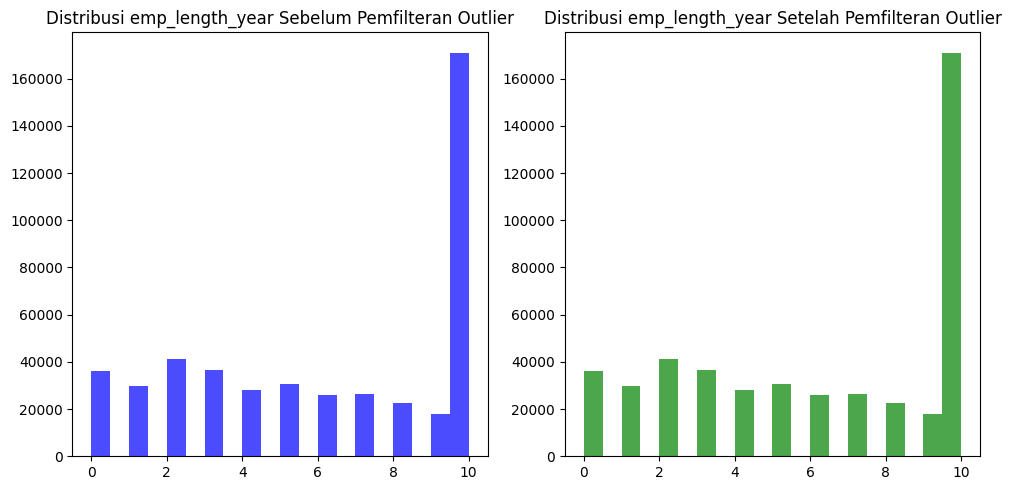

In [56]:
# Visualisasi distribusi sebelum dan setelah pemfilteran outlier
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(loan_data['emp_length_year'], bins=20, color='blue', alpha=0.7)
plt.title('Distribusi emp_length_year Sebelum Pemfilteran Outlier')

plt.subplot(1, 2, 2)
plt.hist(loan_data_filtered['emp_length_year'], bins=20, color='green', alpha=0.7)
plt.title('Distribusi emp_length_year Setelah Pemfilteran Outlier')

plt.tight_layout()
plt.show()

In [57]:
loan_data_filtered.corr()['loan_status']

loan_amnt                             -0.004195
funded_amnt                           -0.003176
funded_amnt_inv                        0.002789
int_rate                              -0.172282
installment                           -0.007176
annual_inc                             0.048958
loan_status                            1.000000
dti                                   -0.043545
open_acc                               0.007993
revol_bal                              0.010254
revol_util                            -0.050173
total_acc                              0.024582
total_pymnt                            0.191777
total_pymnt_inv                        0.195499
total_rec_prncp                        0.247693
total_rec_int                          0.024087
last_pymnt_amnt                        0.168414
monthly_term                          -0.058383
emp_length_year                        0.019483
earliest_cr_line_year                       NaN
grade_num                             -0

**Distribusi visualisasi data**

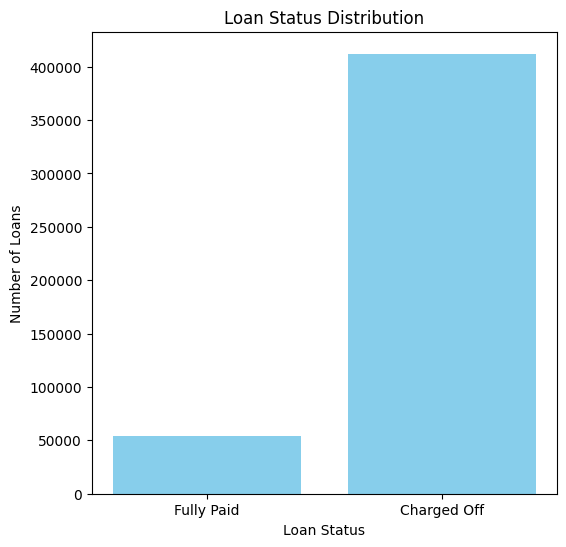

In [58]:
import matplotlib.pyplot as plt

# Hitung jumlah pengamatan untuk setiap nilai loan_status
loan_status_counts = loan_data_filtered['loan_status'].value_counts()

# Buat diagram batang
plt.figure(figsize=(6, 6))
plt.bar(loan_status_counts.index, loan_status_counts.values, color='skyblue')
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.title('Loan Status Distribution')
plt.xticks([0, 1], ['Fully Paid', 'Charged Off']) # Label sumbu x
plt.show()

In [59]:
loan_data_filtered['loan_status'].value_counts()

loan_status
1    412111
0     54174
Name: count, dtype: int64

**Mengatasi inbalance data**

In [60]:
from imblearn.over_sampling import SMOTE

# Pisahkan fitur dan target
X = loan_data_filtered.drop('loan_status', axis=1)
y = loan_data_filtered['loan_status']

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Cek kembali jumlah kelas
print("Jumlah setelah oversampling:")
print(y_resampled.value_counts())


Jumlah setelah oversampling:
loan_status
1    412111
0    412111
Name: count, dtype: int64


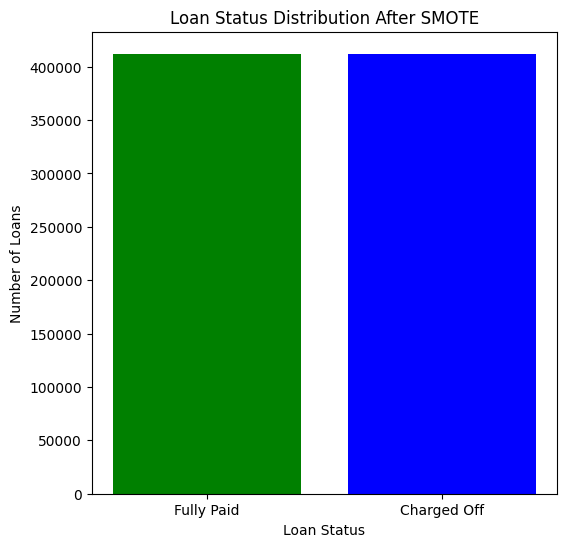

In [61]:
import matplotlib.pyplot as plt

# Visualisasi jumlah kelas setelah oversampling
plt.figure(figsize=(6, 6))
plt.bar(y_resampled.value_counts().index, y_resampled.value_counts().values, color=['blue', 'green'])
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.title('Loan Status Distribution After SMOTE')
plt.xticks([0, 1], ['Fully Paid', 'Charged Off'])
plt.show()


# Data Modelling

# Membagi dataset train and testing

In [62]:
#split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 42)

In [63]:
X_train

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,...,sub_grade_num,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
141593,13900,13900,13900.000000,14.330000,477.300000,67000.000000,26.990000,9.000000,29362.000000,82.800000,...,11,0,1,0,0,0,0,0,0,1
662328,8000,8000,8000.000000,15.098773,277.753949,60000.000000,26.184248,6.000000,3019.792154,64.678479,...,13,0,0,0,0,0,0,0,0,0
729660,5000,5000,5000.000000,15.001617,173.358134,37832.549672,19.399374,9.167450,5665.900499,43.328500,...,12,0,1,0,0,0,0,0,0,1
33619,6000,6000,5925.000000,11.480000,197.820000,75000.000000,11.900000,10.000000,18103.000000,59.500000,...,7,0,0,0,0,0,1,1,0,0
348890,32350,32350,32350.000000,17.570000,1162.570000,106000.000000,19.690000,16.000000,15440.000000,43.400000,...,19,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,5000,5000,5000.000000,8.670000,158.240000,71000.000000,15.800000,10.000000,2886.000000,35.200000,...,6,0,1,0,0,0,0,1,0,0
365838,20000,20000,20000.000000,12.490000,668.980000,72000.000000,11.990000,15.000000,12929.000000,37.700000,...,10,0,0,0,0,0,1,0,1,0
131932,19200,19200,19175.000000,14.090000,657.060000,80000.000000,3.980000,7.000000,15775.000000,43.600000,...,10,0,0,0,0,0,1,1,0,0
671155,18904,18904,18904.874538,9.889373,608.584053,99510.517879,11.830482,10.755259,7258.561652,33.156999,...,5,0,1,0,0,0,0,0,0,0


In [64]:
X_test

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,...,sub_grade_num,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
136387,18000,18000,18000.000000,14.330000,618.090000,50000.000000,13.820000,6.000000,9148.000000,69.800000,...,11,0,0,0,0,0,1,0,0,1
738667,5474,5474,5474.607323,10.983000,179.684717,51576.178030,25.208827,12.000000,33961.602096,42.871727,...,8,0,0,0,0,0,0,0,0,0
289963,17650,17650,17650.000000,13.980000,603.070000,70000.000000,20.570000,11.000000,17921.000000,73.400000,...,13,0,1,0,0,0,0,0,0,1
543435,6411,6411,6411.064832,14.880298,221.796252,36000.000000,24.215627,12.358120,6520.026774,41.954373,...,13,0,0,0,0,0,0,0,0,1
444668,12575,12575,12575.000000,7.900000,393.480000,88000.000000,25.960000,12.000000,23212.000000,38.600000,...,4,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611949,12078,12078,12078.015800,13.859703,412.055153,60000.000000,24.898399,10.040211,4938.745925,40.957384,...,12,0,1,0,0,0,0,1,0,0
281693,21000,21000,21000.000000,15.610000,506.340000,72000.000000,11.520000,12.000000,7817.000000,55.000000,...,16,0,1,0,0,0,0,0,1,0
790901,25579,25579,25556.970524,13.842788,631.384494,124823.163006,19.783795,6.463260,46406.106938,83.772603,...,12,0,1,0,0,0,0,0,0,1
660361,10000,10000,10000.000000,16.979724,356.466881,55182.183811,32.280834,25.724713,21865.982116,52.807582,...,15,0,1,0,0,0,0,0,0,0


# Scalling

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
minmax = MinMaxScaler()

In [67]:
minmax.fit(X_train)

MinMaxScaler()

In [68]:
X_train_scaled = minmax.transform(X_train)
X_test_scaled = minmax.transform(X_test)

In [69]:
X_test_scaled

array([[0.50724638, 0.50724638, 0.51428571, ..., 0.        , 0.        ,
        1.        ],
       [0.14417391, 0.14417391, 0.15641735, ..., 0.        , 0.        ,
        0.        ],
       [0.49710145, 0.49710145, 0.50428571, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.72692754, 0.72692754, 0.73019916, ..., 0.        , 0.        ,
        1.        ],
       [0.27536232, 0.27536232, 0.28571428, ..., 0.        , 0.        ,
        0.        ],
       [0.12971014, 0.12971014, 0.14214285, ..., 1.        , 0.        ,
        0.        ]])

In [70]:
X_train_scaled

array([[0.3884058 , 0.3884058 , 0.39714286, ..., 0.        , 0.        ,
        1.        ],
       [0.2173913 , 0.2173913 , 0.22857143, ..., 0.        , 0.        ,
        0.        ],
       [0.13043478, 0.13043478, 0.14285714, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.54202899, 0.54202899, 0.54785714, ..., 1.        , 0.        ,
        0.        ],
       [0.53344928, 0.53344928, 0.54013927, ..., 0.        , 0.        ,
        0.        ],
       [0.39347826, 0.39347826, 0.40214286, ..., 1.        , 0.        ,
        0.        ]])

In [71]:
def scaling(df, scaler):
  scaled_array = scaler.transform(df)
  scaled_df = pd.DataFrame(scaled_array, columns = minmax.get_feature_names_out())

  return scaled_df

In [72]:
scaling(X_test, minmax)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,...,sub_grade_num,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,0.507246,0.507246,0.514286,0.431686,0.432053,0.006415,0.345423,0.060241,0.003561,0.078214,...,0.294118,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.144174,0.144174,0.156417,0.269525,0.117631,0.006626,0.630286,0.132530,0.013219,0.048036,...,0.205882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.497101,0.497101,0.504286,0.414729,0.421281,0.009083,0.514257,0.120482,0.006975,0.082249,...,0.352941,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.171333,0.171333,0.183173,0.458348,0.147833,0.004548,0.605443,0.136845,0.002538,0.047008,...,0.352941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.350000,0.350000,0.359286,0.120155,0.270964,0.011483,0.649075,0.132530,0.009035,0.043248,...,0.088235,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247262,0.335594,0.335594,0.345086,0.408900,0.284286,0.007749,0.622521,0.108918,0.001922,0.045890,...,0.323529,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
247263,0.594203,0.594203,0.600000,0.493702,0.351906,0.009350,0.287894,0.132530,0.003042,0.061628,...,0.441176,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
247264,0.726928,0.726928,0.730199,0.408081,0.441588,0.016394,0.494592,0.065822,0.018064,0.093874,...,0.323529,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
247265,0.275362,0.275362,0.285714,0.560064,0.244418,0.007107,0.807174,0.297888,0.008511,0.059171,...,0.411765,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
X_train_scaled = scaling(X_train, minmax)
X_test_scaled = scaling(X_test, minmax)

In [74]:
X_train_scaled

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,...,sub_grade_num,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,0.388406,0.388406,0.397143,0.431686,0.331079,0.008683,0.674837,0.096386,0.011429,0.092784,...,0.294118,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.217391,0.217391,0.228571,0.468933,0.187965,0.007749,0.654684,0.060241,0.001175,0.072475,...,0.352941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.130435,0.130435,0.142857,0.464226,0.113093,0.004793,0.484977,0.098403,0.002205,0.048548,...,0.323529,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.159420,0.159420,0.169286,0.293605,0.130637,0.009750,0.297399,0.108434,0.007046,0.066671,...,0.176471,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.923188,0.923188,0.924286,0.588663,0.822551,0.013884,0.492246,0.180723,0.006010,0.048628,...,0.529412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576950,0.130435,0.130435,0.142857,0.157461,0.102251,0.009216,0.394947,0.108434,0.001123,0.039438,...,0.147059,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
576951,0.565217,0.565217,0.571429,0.342539,0.468551,0.009350,0.299650,0.168675,0.005032,0.042240,...,0.264706,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
576952,0.542029,0.542029,0.547857,0.420058,0.460002,0.010416,0.099300,0.072289,0.006140,0.048852,...,0.264706,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
576953,0.533449,0.533449,0.540139,0.216539,0.425235,0.013019,0.295660,0.117533,0.002825,0.037148,...,0.117647,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [76]:
# Inisialisasi model regresi logistik dengan random state
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train_scaled, y_train)

# Inisialisasi model Random Forest dengan random state
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

# Inisialisasi model SVM dengan random state
# svm_model = SVC(random_state=42)
# svm_model.fit(X_train_scaled, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=42)

In [88]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve

# Evaluasi model
def evaluate_model(model, X_test_scaled, y_test):
    predictions = model.predict(X_test_scaled)
    proba = model.predict_proba(X_test_scaled)[:, 1]
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    cm = confusion_matrix(y_test, predictions)
    print("Confusion Matrix:")
    print(cm)
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, proba)
    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"ROC AUC: {roc_auc}")
    return proba, cm

# Dictionary to store ROC curve values and confusion matrices
roc_values = {}
confusion_matrices = {}

print("Logistic Regression Model:")
roc_values['Logistic Regression'], confusion_matrices['Logistic Regression'] = evaluate_model(logistic_regression_model, X_test_scaled, y_test)

print("Random Forest Model:")
roc_values['Random Forest'], confusion_matrices['Random Forest'] = evaluate_model(random_forest_model, X_test_scaled, y_test)

import matplotlib.pyplot as plt
import seaborn as sns

Logistic Regression Model:
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91    123828
           1       0.88      0.97      0.92    123439

    accuracy                           0.92    247267
   macro avg       0.92      0.92      0.92    247267
weighted avg       0.92      0.92      0.92    247267

Confusion Matrix:
[[107039  16789]
 [  3251 120188]]
Accuracy: 0.918954005184679
Recall: 0.9736631048534093
Precision: 0.8774319776312811
ROC AUC: 0.9657783323557252
Random Forest Model:
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97    123828
           1       0.95      0.99      0.97    123439

    accuracy                           0.97    247267
   macro avg       0.97      0.97      0.97    247267
weighted avg       0.97      0.97      0.97    247267

Confusion Matrix:
[[116984   6844]
 [  1187 122252]]
Accuracy: 0.9675209389040996
Reca

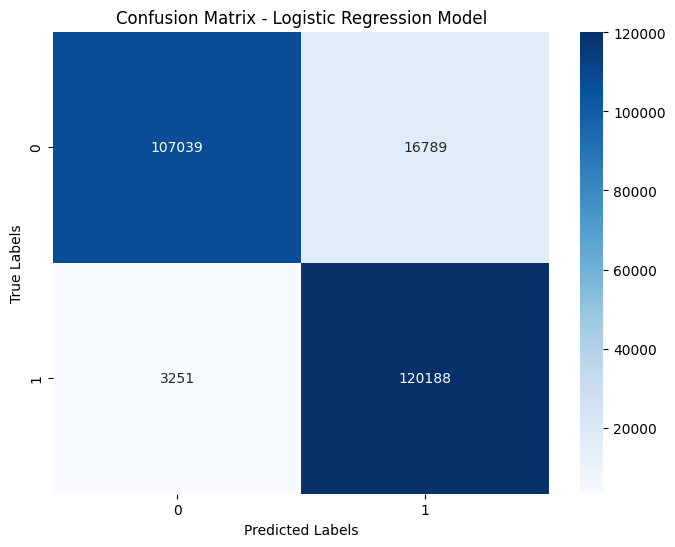

In [89]:
# Membuat heatmap dari confusion matrix untuk Logistic Regression Model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrices['Logistic Regression'], annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()

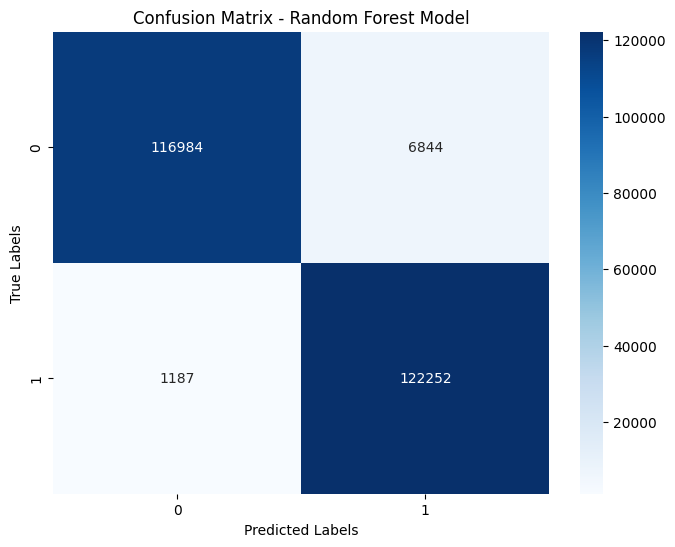

In [90]:
# Membuat heatmap dari confusion matrix untuk Random Forest Model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrices['Random Forest'], annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Model')
plt.show()